# Plotting in 3D

In [1]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

# Palettes for edges and nodes
node_palette = sns.color_palette("dark")
edge_palette = sns.color_palette("pastel")

import random
np.random.seed(10)

In [2]:
from grapgh_io import GraphIO

ciona, ciona_e_att, ciona_n_att, ciona_g_att  = GraphIO.load('../json_connectomes/ciona.json')
fafb, fafb_e_att, fafb_n_att, fafb_g_att = GraphIO.load('../json_connectomes/fafb.json')
worm, worm_e_att, worm_n_att, worm_g_att = GraphIO.load('../json_connectomes/worm_wiring_connectome_0_SL.json')

L = list(worm.edges)
L0 = []
L1 = []
L2 = []
for i in L:
    if i[-1] == 0:
        L0.append(i)
    elif i[-1] == 1:
        L1.append(i)
    elif i[-1] == 2:
        L2.append(i)

worm_0 = worm.edge_subgraph(L0)
worm_1 = worm.edge_subgraph(L1)
worm_2 = worm.edge_subgraph(L2)

In [5]:
def find_nodes(graph, name):
    '''
    Finds nodes in graph object that have coordinate or hemisphere annotations. Stores the coordinates,
    or generates random coordinates that maintain L/R hemisphere dilineation.
    '''
    nodes_w_coors = []
    nodes_w_sides = []
    positions_axial = {}
    positions_coronal = {}
    y_pos = 1
    x_left_pos = -20
    x_right_pos = 35
    for key in graph.nodes:
        try:
            if name == 'ciona':
                if graph.nodes[key]['Side'] != '-':
                    nodes_w_sides.append(key)
                    if graph.nodes[key]['X'] != '-':
                        nodes_w_coors.append(key)
                        positions_axial[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Y']])
                        positions_coronal[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Z']])
            
            elif name == 'worm':
                if graph.nodes[key]['attr_dict']['hemisphere'] == 'left' :
                    nodes_w_sides.append(key)
                    positions_axial[key] = np.asarray([x_left_pos + random.uniform(-15, 15), y_pos])
                    positions_coronal[key] = np.asarray([x_left_pos + random.uniform(-15, 15), y_pos])
                elif graph.nodes[key]['attr_dict']['hemisphere'] == 'right' :
                    nodes_w_sides.append(key)
                    positions_axial[key] = np.asarray([x_right_pos + random.uniform(-15, 15), y_pos])
                    positions_coronal[key] = np.asarray([x_right_pos + random.uniform(-15, 15), y_pos])
                else:
                    continue
            
            elif name == 'fafb':
                if graph.nodes[key]['Side'] != False:
                    nodes_w_sides.append(key)
                    if graph.nodes[key]['X'] != False:
                        nodes_w_coors.append(key)
                        positions_axial[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Y']])
                        positions_coronal[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Z']])

            y_pos += 1

        except:
            y_pos += 1
            continue

    return nodes_w_coors, nodes_w_sides, positions_axial, positions_coronal

ciona_coor_nodes, ciona_side_nodes, ciona_ax_coors, ciona_co_coors = find_nodes(ciona, 'ciona')

_, worm_side_nodes, _, _ = find_nodes(worm_0, 'worm')
_, worm_side_nodes, _, _ = find_nodes(worm_1, 'worm')
_, worm_side_nodes, _, _ = find_nodes(worm_2, 'worm')

fafb_coor_nodes, fafb_side_nodes, fafb_ax_coors, fafb_co_coors = find_nodes(fafb, 'fafb')

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def network_plot_3D(G, node_color, edge_color):
    
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Plot nodes
        for key in G.nodes:
            xi = G.nodes[key]['X']
            yi = G.nodes[key]['Y']
            zi = G.nodes[key]['Z']

            ax.scatter(xi, yi, zi, c=node_color, edgecolors='k', alpha=0.7)

        # Get starting and ending points for each edge
        for i,j in enumerate(G.edges()):
            x = np.array((G.nodes[j[0]]['X'], G.nodes[j[1]]['X']))
            y = np.array((G.nodes[j[0]]['Y'], G.nodes[j[1]]['Y']))
            z = np.array((G.nodes[j[0]]['Z'], G.nodes[j[1]]['Z']))
        
        # Plot the edges as lines
            ax.plot(x, y, z, c=edge_color, alpha=0.25)

        # Legend
        colors = [tuple(node_color[0]), edge_color]
        texts = ["Soma", "Synapse"]
        mkrs = ["o", "_"]
        patches = [ plt.plot([],[], marker=mkrs[i], ms=10, ls="", mec=None, color=colors[i], label="{:s}".format(texts[i]) )[0] for i in range(len(texts)) ]
        
        ax.legend(handles=patches)

def homophilic_plot_3D(G, node_color, edge_colors):
    
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)

        for key in G.nodes:
            xi = G.nodes[key]['X']
            yi = G.nodes[key]['Y']
            zi = G.nodes[key]['Z']

            ax.scatter(xi, yi, zi, c=node_color, edgecolors='k', alpha=0.7)

        count = 0
        for i,j in enumerate(G.edges()):
            x = np.array((G.nodes[j[0]]['X'], G.nodes[j[1]]['X']))
            y = np.array((G.nodes[j[0]]['Y'], G.nodes[j[1]]['Y']))
            z = np.array((G.nodes[j[0]]['Z'], G.nodes[j[1]]['Z']))

            # Plot edges, but each is color-coded specifically according to subtype
            ax.plot(x, y, z, c=edge_colors[count], alpha=0.25)
            
            count += 1
            
        colors = [tuple(node_color[0]), edge_palette[1], edge_palette[0]]
        texts = ["Soma", "Homophilic Synapse", "Heterophilic Synapse"]
        mkrs = ["o", "_", "_"]
        patches = [ plt.plot([],[], marker=mkrs[i], ms=10, ls="", mec=None, color=colors[i], label="{:s}".format(texts[i]) )[0] for i in range(len(texts)) ]
        
        ax.legend(handles=patches)

<IPython.core.display.Javascript object>


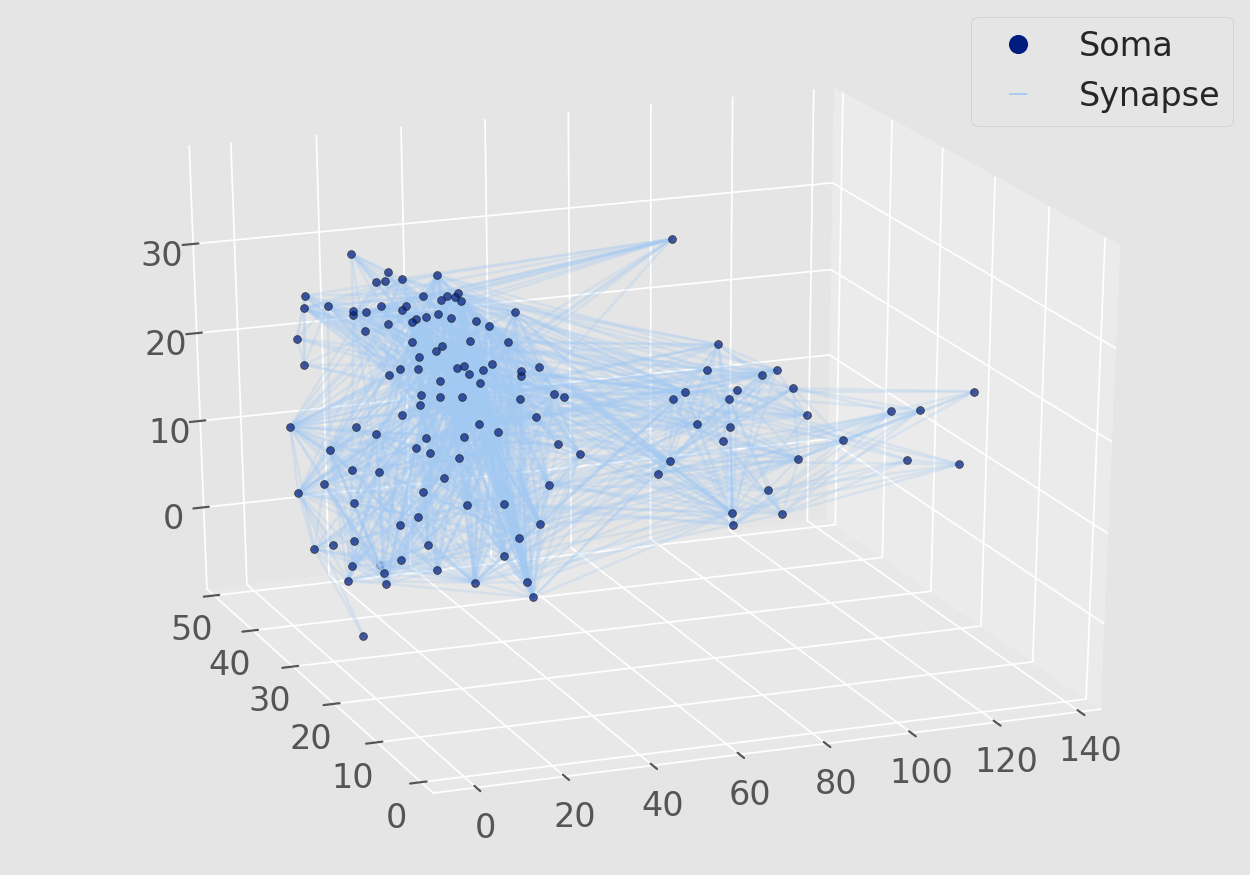

In [7]:
edge_color = edge_palette[0]
node_color = np.asarray(node_palette[0]).reshape((1,3))
network_plot_3D(ciona.subgraph(ciona_coor_nodes), node_color, edge_color)

<IPython.core.display.Javascript object>


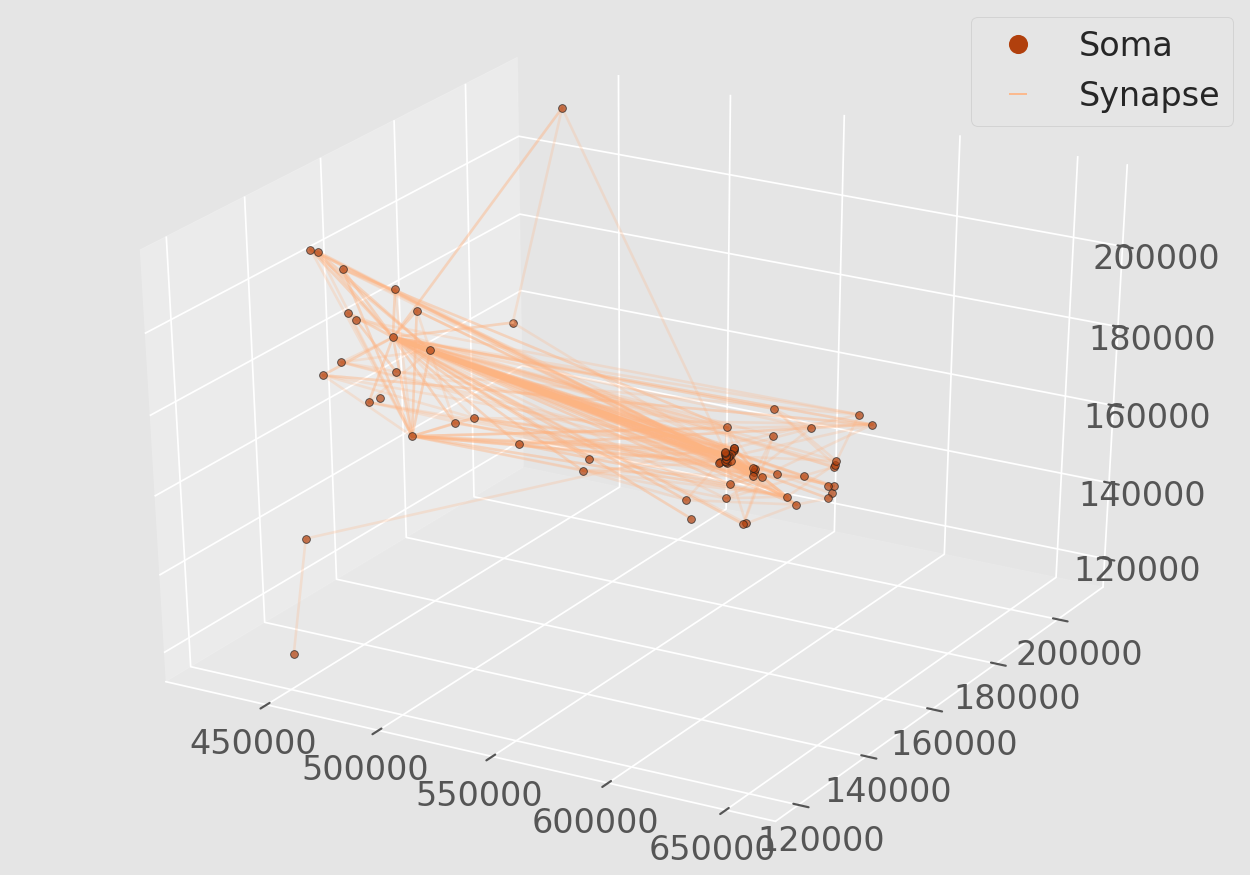

In [8]:
edge_color = edge_palette[1]
node_color = np.asarray(node_palette[1]).reshape((1,3))
network_plot_3D(fafb.subgraph(fafb_coor_nodes), node_color, edge_color)